In [1]:
%run 2_data_preparation_news.ipynb

C:\Users\kasim\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kasim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Title              object
Tag                object
Date       datetime64[ns]
Content            object
dtype: object


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
import pandas as pd
import numpy as np

for col in ['Prev_change', 'Sma_5', 'Volatility' ]:
    tokenized_df[col] = tokenized_df[col].fillna(tokenized_df[col].mean())
tokenized_df.dropna(subset=['Content'])

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.9, min_df=5)
X_text = vectorizer.fit_transform(tokenized_df['Content'])

numeric_features = ['Prev_change', 'Sma_5', 'Volatility']
numeric_data = tokenized_df[numeric_features]
scaler = StandardScaler()
X_numeric = scaler.fit_transform(numeric_data)

X_combined = hstack([X_text, X_numeric])

y = tokenized_df['Simple Label']

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.84      0.84      0.84      1636
     positiv       0.81      0.81      0.81      1343

    accuracy                           0.83      2979
   macro avg       0.82      0.82      0.82      2979
weighted avg       0.83      0.83      0.83      2979



In [3]:
feature_names = vectorizer.get_feature_names_out().tolist() + numeric_features

coefficients = model.coef_[0]

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients
})

top_positive = coef_df.sort_values(by='coefficient', ascending=False).head(15)
top_negative = coef_df.sort_values(by='coefficient').head(15)

print(coef_df[coef_df['coefficient'].abs() > 1])
print(coef_df[coef_df['feature'].isin(['stock'])])

           feature  coefficient
4246           cut     1.279799
9906       housing     1.111922
15069       oracle     1.203949
15164      outlook     1.387310
24556  Prev_change    -3.360623
      feature  coefficient
21252   stock      0.11318


C:\Users\kasim\AppData\Local\Temp\ipykernel_15528\2272052374.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='coefficient', y='feature', palette='coolwarm')


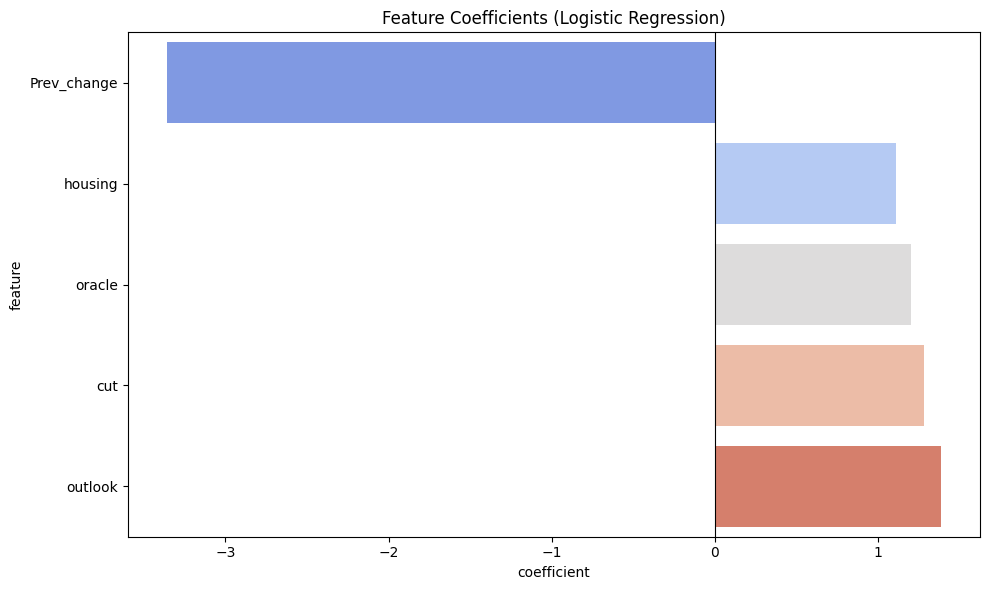

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = coef_df[coef_df['coefficient'].abs() > 1]

df = df.sort_values(by='coefficient')

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='coefficient', y='feature', palette='coolwarm')
plt.axvline(0, color='black', linewidth=0.8)
plt.title('Feature Coefficients (Logistic Regression)')
plt.tight_layout()
plt.show()